# Problem Statement for the Advertising data
The dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure. The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars. You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\razas\Downloads\Advertising.csv",header =0,index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

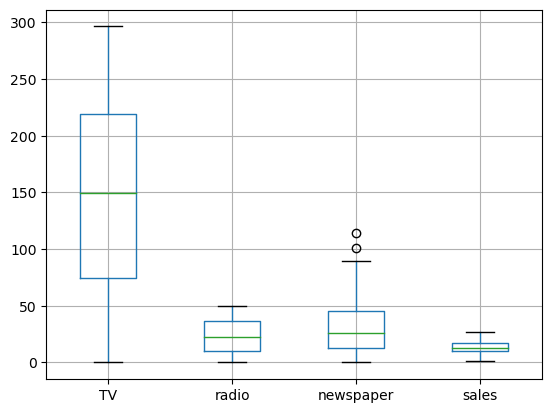

In [9]:
data.boxplot() 
plt.show()  

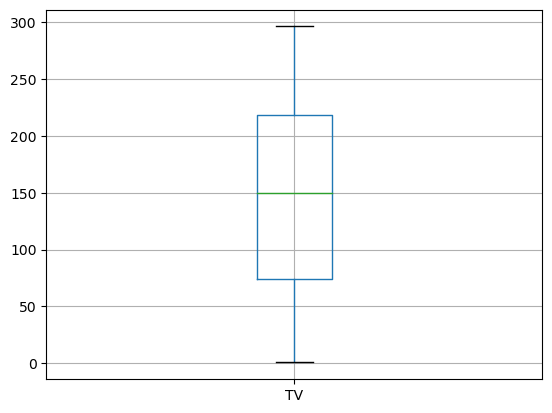

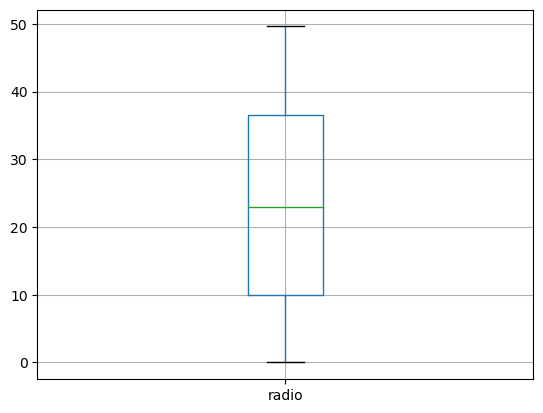

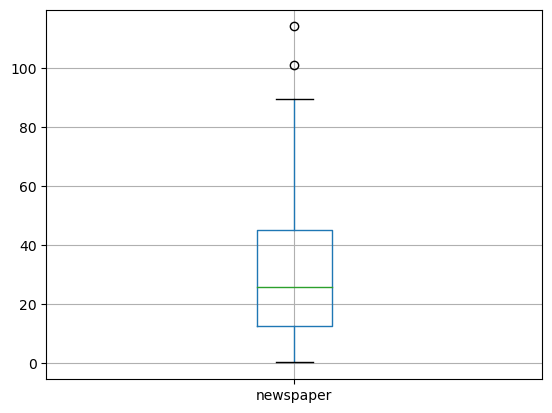

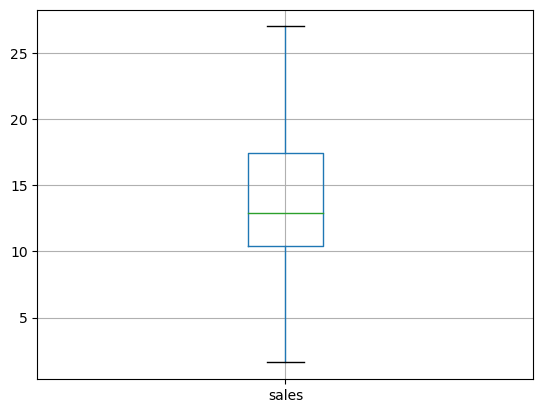

In [10]:
## Assumption 1
# There should be no out liers in data.
# check using boxplot.

for i in data.columns:
    data.boxplot(column=i)
    plt.show()               ### graph gets affected  due to  the one varible of the range


In [11]:
data[data['newspaper']>=90].index


Int64Index([17, 102], dtype='int64')

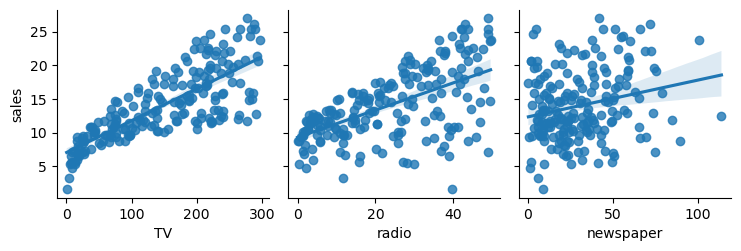

In [12]:
##Assumption 2:Assumption of linearity: Every independent variable sould have a linear relationship with the dependent variable

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars=['sales'],kind='reg')
plt.show()      

In [14]:
X = data.loc[:,['TV','radio','newspaper']]
Y=data.loc[:,'sales']

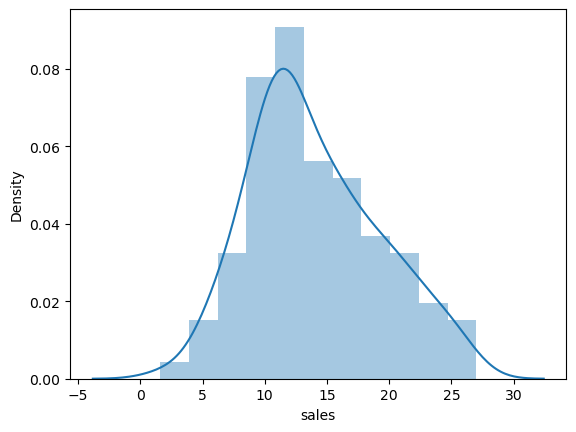

In [15]:
#Assumption of Normality: The depedent variable should follow an appropriate normal distribution

sns.distplot(Y,kde=True)
plt.show()

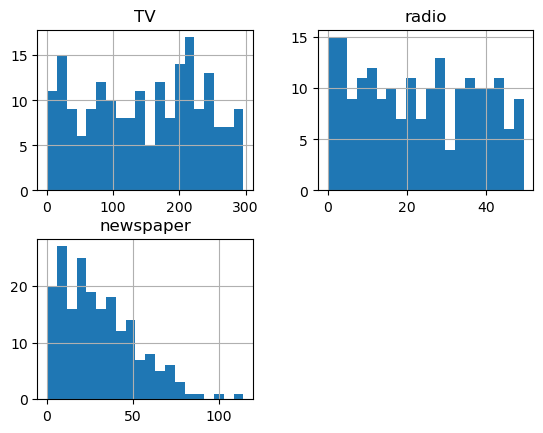

In [16]:
X.hist(bins=20)
plt.show()  

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


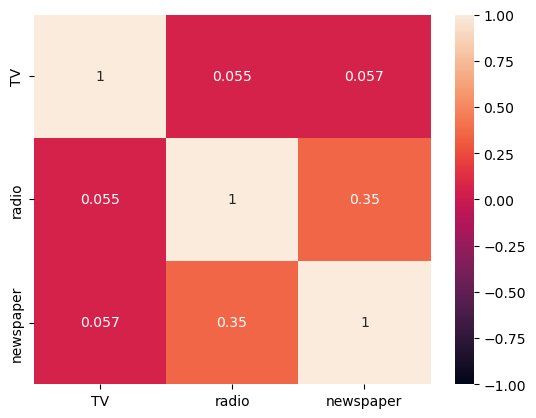

In [17]:
# Assumption of no multicolliniarity : there should be no multicolliniarity between the indipendent var
#multicolliniarity is the relationship amongst the multiple independent var

corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

# A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.
​

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df= pd.DataFrame()
vif_df["features"]=X.columns
vif_df["VIF Factor"]=[vif(X.values,i)for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,TV,2.49
1,radio,3.29
2,newspaper,3.06


# Modal Building
sklearn :------- Simple and efficient tools for predictive data analysis Accessible to everybody, and reusable in various contexts Built on NumPy, SciPy, and matplotlib Open source, commercially usable - BSD license

In [19]:
from sklearn.model_selection import train_test_split 
## split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
                                                random_state=10)


# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
lm = LinearRegression()

# Train the Linear Regression model
lm.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = lm.predict(X_test)
print("Predicted values:", Y_pred)



# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

Predicted values: [18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]
R-squared: 0.8353672324670594
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857


# Applying Ridge Regression

In [23]:

from sklearn.linear_model import Ridge

# Create a Ridge regression model object
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Train the Ridge model
ridge.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = ridge.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
​
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
​
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

R-squared: 0.8353686978689224
RMSE: 2.5885183243060816
Adj R-square: 0.8328488309995692


# Applying Lasso Regression

In [24]:
from sklearn.linear_model import Lasso


# Create a Lasso regression model object
lasso = Lasso(alpha=1.0) #adjust the alpha

# Train the Lasso model
lasso.fit(X_train, Y_train)

# Make predictions
Y_pred = lasso.predict(X_test)



# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


# Applying Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with the correct parameters
DecisionTree = DecisionTreeRegressor(random_state=10, criterion="absolute_error", splitter='best')

# Fit the model on the training data
DecisionTree.fit(X_train, Y_train)

# Predict on the test data
Y_pred = DecisionTree.predict(X_test)

# Print the true vs predicted values
print(list(zip(Y_test, Y_pred)))


# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 




[(18.4, 17.3), (7.2, 6.6), (18.0, 19.4), (25.5, 24.4), (22.6, 19.0), (14.6, 14.9), (14.9, 15.5), (23.7, 23.8), (22.3, 21.7), (9.3, 7.3), (25.4, 24.4), (8.6, 9.7), (8.7, 7.3), (20.1, 19.6), (19.7, 20.2), (14.0, 12.0), (19.8, 18.9), (5.3, 3.2), (21.8, 22.1), (22.6, 21.7), (15.6, 15.9), (1.6, 3.2), (24.2, 22.1), (16.0, 12.6), (14.8, 13.4), (7.0, 8.5), (9.5, 8.0), (10.4, 10.8), (23.2, 22.1), (7.6, 6.6), (12.9, 12.2), (21.5, 22.1), (6.9, 7.6), (7.3, 7.6), (12.8, 12.0), (11.8, 11.6), (8.8, 8.7), (15.0, 13.4), (10.6, 10.6), (11.5, 12.2)]
R-squared: 0.957045025787266
RMSE: 1.322214052262341
Adj R-square: 0.9563875516921732


# Tuning the Decision Tree

In [29]:
from sklearn.model_selection import GridSearchCV


# Define the model
decision_tree = DecisionTreeRegressor(random_state=10)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['poisson', 'friedman_mse', 'absolute_error', 'squared_error', 'mae'],
    'splitter': ['best', 'random']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)



# Evaluate on test data
Y_pred = grid_search.best_estimator_.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 



Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'criterion': 'poisson', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best R-squared Score: 0.9516299456771344
R-squared: 0.9364551396781449
RMSE: 1.6081822036075393
Adj R-square: 0.9354825142650552


# Applying Random Forest Regressor

In [30]:
# predicting using the decision_Tree_c 
from sklearn.ensemble import RandomForestRegressor

Random_forest = RandomForestRegressor(n_estimators=200, random_state=10, max_depth=20, min_samples_leaf=1)
Random_forest.fit(X_train,Y_train)

#fit the modal on the data and predict the values 
Y_pred=Random_forest.predict(X_test)
print(Y_pred)


# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 


[18.5445  6.9715 19.008  24.957  21.1245 15.133  14.971  22.599  22.4855
  7.391  24.952   9.402   7.4    19.4475 19.915  12.8025 18.814   4.572
 21.7495 21.9005 15.3515  5.1005 24.243  15.308  13.3925  6.9865  9.0965
 11.0605 22.792   7.014  13.0985 21.456   7.747   7.877  12.4205 11.7215
  9.1075 13.464  10.041  11.921 ]
R-squared: 0.9783495237590668
RMSE: 0.9387042066061098
Adj R-square: 0.9780181389186443


# Tuning the Random Forest Regressor¶

In [31]:
# Define the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=10)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Setup GridSearchCV with the defined model, parameter grid, and evaluation criteria
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to find the best parameters using training data
grid_search.fit(X_train, Y_train)

# Print the best parameters found by GridSearchCV and the best R-squared score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

# Evaluate the best model on the test data
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and print R-squared, RMSE, and Adjusted R-squared on the test set
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared Score: 0.9764886533741395
R-squared: 0.9787836174654693
RMSE: 0.9292460115599077
Adj R-square: 0.9784588769164714


In [ ]:
# random forest regressor is the  best algorithm that gives the highest r2 value after tuning

# Applying K-Nearest Neighbor(KNN) Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model object
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the KNN model
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9284857726620428
RMSE: 1.7060480649735519
Adj R-square: 0.9273911671415639


# Applying Support Vector Regressor

In [33]:
from sklearn.svm import SVR

# Create SVR model object
svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR

# Train SVR model
svr.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svr.predict(X_test)




from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model performance
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  # Calculate RMSE
print("RMSE:", rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 


R-squared: 0.8236739091380969
RMSE: 2.678880412710699
Adj R-square: 0.8209750404004147


In [36]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

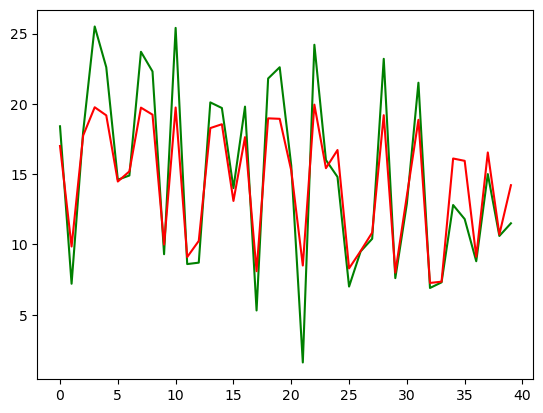

In [35]:
 
new_df["Actual sales"].plot(color='green')
new_df["Predicted sales"].plot(color='red')
plt.show()

# Random Forest Regressor is the  best algorithm that gives the highest r2 value 0.97 after tuning

# Project Ends Here